# Manipulación de datos

## Objetivos

En esta oportunidad veremos como:

* Lidear con los valores que faltan
* Formato de datos correcto
* Estandarizar y normalizar los datos

<h2>¿Cuál es el propósito de la manipulación de datos? </h2>

Debemos manipular los datos para convertirlos de un formato inicial a un formato que puede ser mejor para el análisis.

<h3>Importando el dataset</h3>

Trabajaremos con el dataset del automóvil que está almacenado en un repositorio de datos en la siguiente dirección: https://archive.ics.uci.edu/, está en un formato CSV (valores separados por comas).

Puede encontrar el "Automobile Dataset" en el siguiente enlace: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a>. 


In [69]:
import pandas as pd
import matplotlib.pylab as plt

<h2>Leyendo el dataset desde la URL y agregando los encabezados</h2>

Primero asignamos el dataset a la variable 'archivo'.

In [70]:
archivo= 'auto.csv'

Después creamos una lista con los encabezados que ya obtuvimos del análisis anterior:

In [71]:
encabezados = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]


Usamos el método de Pandas <b>read_csv()</b> para leer los datos desde la dirección del enlace. En el parámetro 'names' colocamos la lista de encabezados que creamos.

In [72]:
df = pd.read_csv(archivo, names= encabezados)

Para echarle un vistazo al dataset usamos el metodo <code>head()</code> 

In [73]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Como puede ver, varios signos de interrogación aparecieron en el dataset; esos valores que faltan pueden dificultar el análisis posterior. 
<div>Entonces, ¿cómo identificamos todos los valores que faltan y nos ocupamos de ellos? </div> 

<b> ¿Cómo trabajar con los datos que faltan? </b>

Pasos seguiremos para trabajar con los datos faltantes:
<ol>
    <li>Identificar datos faltantes</li>
    <li>Tratar los datos que faltan</li>
    <li>Formatar correctamente los datos</li>
</ol>

<h2>Identificar y manejar los valores que faltan</h2>


<h3>Identificar valores perdidos</h3>
<h4>Convertir "?" a NaN</h4>
En el dataset de automóviles, los datos que faltan vienen con el signo de interrogación "?".
Reemplazamos "?" con NaN (Not a Number), que es el valor por defecto que Python asigna por razones de velocidad y conveniencia computacional. Utilizamos la función: 
<pre> .replace(A, B, inplace = True) </pre>
para sustituir A por B.

In [74]:
import numpy as np

# Reemplazamos '?' por 'NaN' con ayuda del la biblioteca Numpy
df.replace('?', np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4>Evaluación de datos perdidos</h4>

Los valores que faltan se convierten de forma predeterminada. Utilizaremos las siguientes funciones para identificar estos valores que faltan. Podemos utilizar dos métodos para detectar los datos que faltan:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>

La salida es un valor booleano que indica si el valor que se pasa al argumento es un dato faltante.

In [75]:
faltantes = df.isnull()
faltantes.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"Verdadero" significa que el valor es un valor faltante, mientras que "False" significa que el valor no es un valor faltante.

<h4>Contando los valores que faltan en cada columna</h4>
<p>
Agredando <code>isnull().sum()</code> podemos calcular rápidamente el número de valores que faltan en cada columna.
</p>

In [76]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Basado en el resumen anterior, hay siete columnas que contienen datos faltantes:
<ol>
    <li>"normalized-losses": 41 datos faltantes</li>
    <li>"num-of-doors": 2 datos faltantes</li>
    <li>"bore": 4 datos faltantes</li>
    <li>"stroke" : 4 datos faltantes</li>
    <li>"horsepower": 2 datos faltantes</li>
    <li>"peak-rpm": 2 datos faltantes</li>
    <li>"price": 4 datos faltantes</li>
</ol>

<h3>Tratar con los datos faltantes</h3>
<b> ¿Cómo debemos tratar con los datos faltantes? </b>

<ol>
    <li>Eliminando los datos<br>
        a. Eliminar toda la fila<br>
        b. Eliminar toda la columna
    </li>
    <li>Reemplazar datos<br>
        a. Reemplazándolos por el promedio<br>
        b. Reemplazándolos por la frecuencia<br>
        c. Reemplazándolos basado en otras funciones
    </li>
</ol>

Solo deberíamos eliminar columnas enteras si la mayoría de las entradas en la columna están vacías. En el dataset, ninguna de las columnas está lo suficientemente vacía como para eliminarla por completo.
Tenemos cierta libertad para elegir qué método utilizar para reemplazar los datos; sin embargo, algunos métodos pueden parecer más razonables que otros. Aplicaremos cada método a diferentes columnas:

<b>Reemplazando por el promedio:</b>
<ul>
    <li>"normalized-losses": 41 datos que faltan, lo reemplazaremos con el promedio</li>
    <li>"stroke": 4 datos que faltan, lo reemplazaremos con la media</li>
    <li>"bore": 4 datos que faltan, lo reemplazaremos con la media</li>
    <li>"horsepower": 2 datos que faltan, lo reemplazaremos con la media</li>
    <li>"peak-rpm": 2 datos que faltan, lo reemplazaremos con la media</li>
</ul>

<b>Reemplazando por la frecuencia:</b>
<ul>
    <li>"num-of-doors": 2 datos que faltan, lo sustituimos por "cuatro". 
        <ul>
            <li>Razón: 84% sedanes son de cuatro puertas. Como cuatro puertas es más frecuente, es más probable que ocurra</li>
        </ul>
    </li>
</ul>

<b>Eliminamos toda la fila:</b>
<ul>
    <li>"price": 4 datos que faltan, simplemente eliminamos toda la fila
        <ul>
            <li>Razón: Si queremos predecir el precio. No podemos utilizar ninguna fila sin datos de precios para la predicción; por lo tanto, cualquier fila ahora sin datos de precios no nos es útil. </li>
        </ul>
    </li>
</ul>

<h4> Calculamos el valor promedio de la columna "normalized-losses" </h4>

In [77]:
prom_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Promedio de normalized-losses:", prom_norm_loss)

Promedio de normalized-losses: 122.0


<h4>Sustituimos "NaN" por el promedio en la columna "normalized-losses" </h4>

In [78]:
df["normalized-losses"].replace(np.nan, prom_norm_loss, inplace=True)

<h4>Calcular el valor promedio de la columna "bore" </h4>

In [79]:
prom_bore = df['bore'].astype('float').mean(axis=0)
print("Promedio de bore:", prom_bore)

Promedio de bore: 3.3297512437810943


<h4>Sustituimos "NaN" por el valor promedio en la columna "bore" </h4>

In [80]:
df["bore"].replace(np.nan, prom_bore, inplace=True)

<h4>Ahora haremos lo mismo para las columnas: </h4>

<li> Stroke </li>
<li> horsepower </li>
<li> peakrpm </li>

In [81]:
# Columna stroke
prom_stroke = df['stroke'].astype('float').mean(axis=0)
print('Promedio stroke', prom_stroke)

df['stroke'].replace(np.nan, prom_stroke, inplace=True)

Promedio stroke 3.255422885572139


In [82]:
# Columna horsepower
prom_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Promedio horsepower:", prom_horsepower)

df['horsepower'].replace(np.nan, prom_horsepower, inplace=True)

Promedio horsepower: 104.25615763546799


In [83]:
# Columna peakrpm
prom_peakrpm = df['peak-rpm'].astype('float').mean(axis=0)
print("Promedio peak rpm:", prom_peakrpm)

df['peak-rpm'].replace(np.nan, prom_peakrpm, inplace=True)

Promedio peak rpm: 5125.369458128079


Para ver qué valores están presentes en una columna en particular, podemos usar el método <code>.value_counts()</code>:

In [84]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

Podemos ver que cuatro puertas es el tipo más común. También podemos usar el método ". idxmax()" para calcular el tipo más común automáticamente:

In [85]:
df['num-of-doors'].value_counts().idxmax()

'four'

El procedimiento de reemplazo es similar a lo que hemos visto anteriormente:

In [86]:
# Reemplazamos los valores faltantes en 'num-of-doors' por el valor más frecuente
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Finalmente, eliminamos todas las filas que no tienen datos de precios:

In [87]:
# Simplemente eliminamos tolas la filas con valores NaN en la columna "price"
df.dropna(subset=["price"], axis=0, inplace=True)

# Como eliminamos 2 filas, resetearemos el íncide
df.reset_index(drop=True, inplace=True)

In [88]:
# Veamos los valores faltantes nuevamente:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

<b>Bien! </b> Ahora, tenemos un dataset sin valores faltantes.

<h2>Formato correcto de datos</h2>

<p>El último paso en la limpieza de datos es verificar y asegurarse de que todos los datos están en el formato correcto (int, float, text u otro). </p>

En Pandas, se utiliza:
<p><b>.dtype()</b> para comprobar el tipo de datos</p>
<p><b>.astype()</b> para cambiar el tipo de datos</p>


<h4>Enumeremos los tipos de datos para cada columna</h4>

In [89]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>Como podemos ver arriba, algunas columnas no son del tipo de datos correcto. Las variables numéricas deben tener tipo 'float' o 'int', y las variables con texto tales como categorías deben tener tipo 'objeto'. Por ejemplo, los valores numéricos 'bore' y 'stroke' describen los motores, por lo que debería esperar que sean del tipo 'float' o 'int'; sin embargo, se muestran como tipo 'object'. Debemos convertir los tipos de datos a un formato adecuado para cada columna usando el método "astype()". </p> 


<h4>Convirtiendo tipos de datos a formato adecuado</h4>

In [90]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

<h4>Enumeremos las columnas después de la conversión</h4>

In [91]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<b> ¡Excelente! </b>

Ahora finalmente obtuvimos el dataset limpio, sin valores faltantes y con todos los datos en su formato adecuado.

<h2>Normalización de datos</h2>

<b>¿Por qué la normalización? </b>
<p>La normalización es el proceso de transformar valores de varias variables en un rango similar. Las normalizaciones típicas incluyen 
<ol>
    <li>escalar la variable para que el promedio de la variable sea 0</li>
    <li>escalar la variable para que la varianza sea 1</li> 
    <li>escalar la variable para que los valores de las variables se encuentren entre 0 y 1</li>
</ol>
</p>

<b>Ejemplo</b>
<p>Para demostrar la normalización, digamos que deseamos escalar las columnas "length", "width" y "height". </p>
<p><b>Objetivo:</b> normalizar esas variables para que su valor oscile entre 0 y 1</p>
<p><b>Método:</b> reemplazar el valor original por (valor original)/(valor máximo)</p>

In [92]:
# Reemplazamos (valor original) por (valor original)/(valor máximo)
df['length'] = df['length'] / df['length'].max()
df['width'] = df['width'] / df['width'].max()
df['height'] = df['height'] / df['height'].max()

df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Aquí hemos normalizado las columnas "length", "width" y "height" para caer en el rango entre 0 y 1.

<h2>Binning</h2>
<b>¿Por qué debemos separar en bins? </b>
<p>
    El binning es un proceso de transformación de variables numéricas continuas en 'bins' categóricos discretos para el análisis agrupado.
</p>

<b>Ejemplo: </b>
<p>En este dataset, "horsepower" es una variable numérica que va desde 48 a 288 y tiene 59 valores únicos. ¿Qué pasa si solo queremos estudiar la diferencia de precios entre los autos con alto, medio y bajo horsepower (Caballos de fuerza)? Podemos reorganizarlos en tres 'bins' para simplificar el análisis. </p>

<p>Usamos el método Pandas 'cut' para segmentar la columna 'horsepower' en 3 contenedores. </p>

<h3>Ejemplo de Binning en Pandas</h3>

Convertimos los datos al formato correcto:

In [93]:
df["horsepower"] = df["horsepower"].astype(int, copy=True)

Mostremos un histograma de 'horsepower' para ver la distribución de caballos de fuerza.

<Axes: title={'center': 'Distribución de "horsepower"'}, xlabel='Horsepower', ylabel='Frecuencia'>

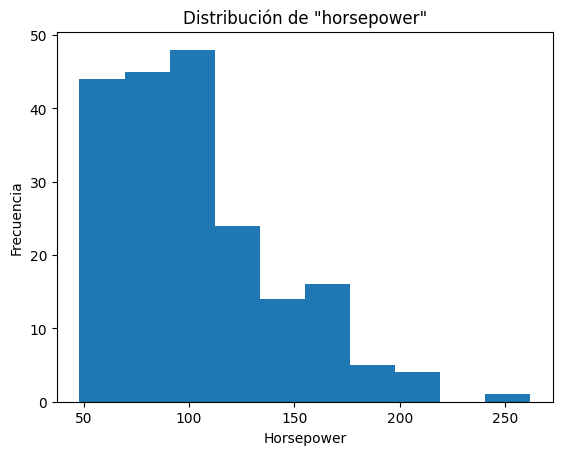

In [94]:


df['horsepower'].plot(kind='hist', 
                      xlabel='Horsepower',
                      ylabel='Frecuencia', 
                      title='Distribución de "horsepower"')

<p>Para encontrar 3 contenedores de igual tamaño usaremos la función <code>linspace de Numpy (start_value, end_value, numbers_generated</code>. </p>
<p>Dado que deseamos incluir el valor mínimo de caballos de fuerza, establecemos start_value = min(df["horsepower"]). </p>
<p>Dado que deseamos incluir el valor máximo de caballos de fuerza, establecemos end_value = máx(df["horsepower"]). </p>
<p>Dado que estamos construyendo 3 contenedores de igual longitud, necesitamos 4 divisores, por lo que, numbers_generated = 4.</p>

Creamos un array que va desde un valor mínimo a un valor máximo utilizando el tamaño calculado anteriormente. Los valores determinarán cuándo termina un contenedor y comienza otro.



In [95]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Establecemos nombres del grupo:

In [96]:
nombres_grupo = ['Bajo', 'Medio', 'Alto']

Aplicamos la función "cut" para determinar a cual pertenece cada valor de `df['horsepower']` .

In [97]:
df['horsepower_grupo'] = pd.cut(df['horsepower'], bins, labels=nombres_grupo, include_lowest=True )
df[['horsepower','horsepower_grupo']].head(20)

,horsepower,horsepower_grupo
0,111,Bajo
1,111,Bajo
2,154,Medio
3,102,Bajo
4,115,Bajo
5,110,Bajo
6,110,Bajo
7,110,Bajo
8,140,Medio
9,101,Bajo


Veamos el número de vehículos en cada contenedor:

In [98]:
df['horsepower_grupo'].value_counts()

horsepower_grupo
Bajo     153
Medio     43
Alto       5
Name: count, dtype: int64

Grafiquemos la distribucion nuevamente

<Axes: title={'center': 'Grupos de "horsepower"'}, xlabel='Grupos', ylabel='Cantidad'>

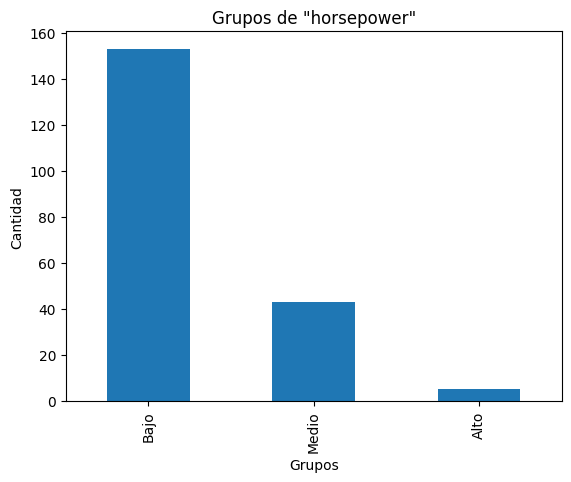

In [99]:
df['horsepower_grupo'].value_counts().plot(kind='bar',
                                           title='Grupos de "horsepower"',
                                           xlabel='Grupos',
                                           ylabel='Cantidad')


Observando el gráfico de arriba veremos la columna "horsepower" basada en 3 categorías ("Bajo", "Medio" y "Alto"). 

Hemos reducido con éxito los intervalos de 59 a 3



<h3>Visualizar los contenedores</h3>

Normalmente, utilizamos un histograma para visualizar la distribución de los contenedores que hemos creado anteriormente. 

<Axes: title={'center': 'Bins de horsepower'}, xlabel='Horsepower', ylabel='Cantidad'>

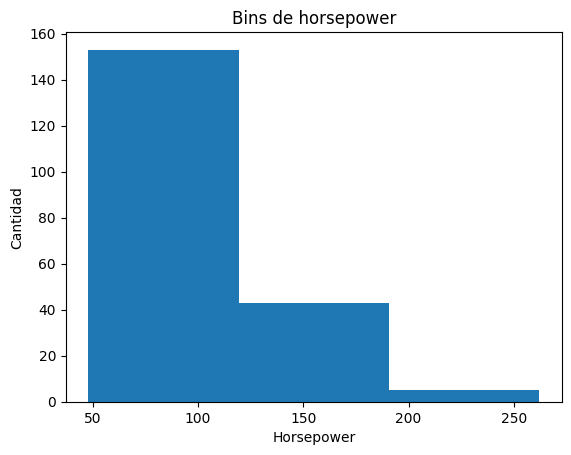

In [100]:
df['horsepower'].plot(kind='hist', bins=3,
                      title='Bins de horsepower',
                      xlabel='Horsepower', 
                      ylabel='Cantidad')

La gráfica de arriba muestra el resultado de la separación del atributo "horsepower". 

<h2>Variable indicadora (o variable ficticia)</h2>
<b> ¿Qué es una variable indicadora? </b>
<p>
    Una variable indicadora (o variable ficticia) es una variable numérica utilizada para etiquetar categorías. Se les llama 'ficticia' porque los números en sí no tienen un significado inherente. 
</p>

<b> ¿Por qué usar variables indicadoras? </b>
<p>
    Se utilizan variables indicadoras para que pueda utilizar variables categóricas para el análisis de regresión en los módulos posteriores.
</p>
<b>Ejemplo</b>
<p>
    La columna "tipo combustible" tiene dos valores únicos: "gas" o "diésel". Un análisis de Regresión no entiende palabras, solo números. Para utilizar este atributo en el análisis de regresión, debemos convertir "fuel-type" a variables indicadoras.
</p>

<p>
    Utilizaremos el método get_dummies de Pandas para asignar valores numéricos a diferentes categorías del tipo de combustible. 
</p>


In [101]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'horsepower_grupo'],
      dtype='object')

Seleccionaremos las variables indicadoras y las asignaremos a un nuevo dataframe "var_indicadora":

In [102]:
var_indicadora1 = pd.get_dummies(df['fuel-type'])
var_indicadora1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


Cambiamos los nombres de las columnas para tener más claridad y reemplazamos False por 0 y True por 1:

In [103]:
var_indicadora1.rename(columns={'gas':'fuel_gas', 'diesel':'fuel_diesel'}, inplace=True)
var_indicadora1 = var_indicadora1.replace([False, True], [0, 1])
var_indicadora1

,fuel_diesel,fuel_gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


In [104]:
# combinamos el dataframe "df" y "var_indicadora" 
df = pd.concat([df, var_indicadora1], axis=1)

# Eliminamos la columna original "fuel-type" de "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [106]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower_grupo,fuel_diesel,fuel_gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27,13495.0,Bajo,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27,16500.0,Bajo,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,19,26,16500.0,Medio,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,24,30,13950.0,Bajo,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,18,22,17450.0,Bajo,0,1


Las dos últimas columnas son ahora la representación variable indicadora de la variable fuel-type. Ahora son todas de 0 y 1.

Guardamos el nuevo csv

In [107]:
df.to_csv('auto_df-limpio.csv')

### Gracias por leer

## Autor

<a href="https://www.linkedin.com/in/jesus-oliveros-860955223/" target="_blank">Jesús Oliveros</a>